# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
def dice_roll():
    new_dict = {}
    index = 0
    my_list = np.arange(1,7)
    for i in range(1,11):
        random_item = random.choice(my_list)
        new_dict[index] = {"Roll" : i, "Result" : random_item}
        index += 1
    return new_dict

df = pd.DataFrame.from_dict(dice_roll(), orient="index")
df

,Roll,Result
0,1,3
1,2,1
2,3,6
3,4,1
4,5,5
5,6,2
6,7,2
7,8,4
8,9,3
9,10,2


#### 2.- Plot the results sorted by value.

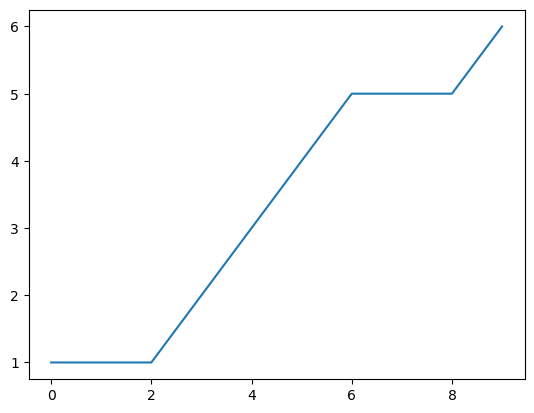

In [184]:
my_df = df.sort_values(by="Result")
plt.plot(my_df["Result"].values)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

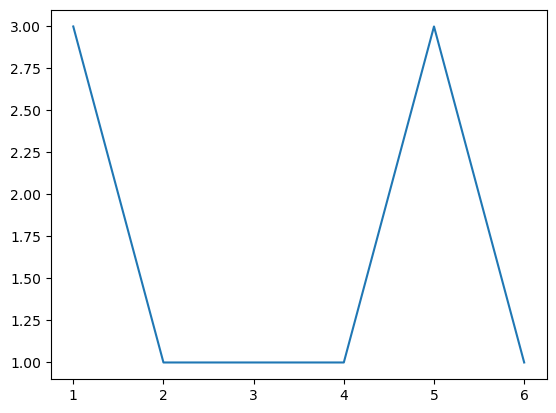

In [187]:
sorted_df = my_df.groupby("Result").agg("count").reset_index()
sorted_df
plt.plot(sorted_df["Result"],sorted_df["Roll"])
plt.show()

In [51]:
"""
In the plot above you can see on which roll(s) the number was returned. In contrast on the second Plot you can see how often
the number was returned in total, for 10 rolls.
"""

'\nIn the plot above you can see on which roll(s) the number was returned. In contrast on the second Plot you can see how often\nthe number was returned in total, for 10 rolls.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [133]:
def summary_stats(df):
    x = 0
    for i in df[input("Enter name of Column: ")]:
        x += i
    mean = x/len(df)
    return mean
df = pd.DataFrame.from_dict(dice_roll(), orient="index")
summary_stats(df)

Enter name of Column: Result


3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [139]:
sorted_df = df.groupby("Result").agg("count").reset_index()
display(sorted_df)
mean = sum(sorted_df["Roll"]) / len(sorted_df["Roll"])
print(round(mean,2))

,Result,Roll
0,1,3
1,2,1
2,3,1
3,4,1
4,5,3
5,6,1


1.67


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [107]:
def get_median():
    x = df["Result"].reset_index(drop=True)
    n = len("Result")
    if n%2 == 0:
        return (x.iloc[int(n / 2)] + x.iloc[int(n / 2) - 1]) / 2
    else:
        return x.iloc[int((n-1)/2)]
    
median = get_median()
print(median)

2.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [116]:
def quartiles():
    x = df["Result"].reset_index(drop=True)
    x = x.sort_values()
    n = len(x)    

    if n % 4 == 0:
        q1 = (x.iloc[int(n / 4)] + x.iloc[int(n / 4) - 1]) / 2
        q3 = (x.iloc[int(n * 3 / 4)] + x.iloc[int(n * 3 / 4) - 1]) / 2
    else:
        q1 = x.iloc[int(n / 4)]
        q3 = x.iloc[int(n * 3 / 4)]
        

    if n % 2 == 0:
        q2 = (x.iloc[int(n / 2)] + x.iloc[int(n / 2) - 1]) / 2
    else:
        q2 = x.iloc[int((n - 1) / 2)]

    return q1, q2, q3

    
result_q1, result_q2, result_q3 = quartiles()
print("Q1:", result_q1)
print("Q2:", result_q2)
print("Q3:", result_q3)

Q1: 2
Q2: 2.5
Q3: 4


In [113]:
print(df["Result"].quantile(0.25))
print(df["Result"].quantile(0.5))
print(df["Result"].quantile(0.75))
print(df["Result"].mean())

2.0
2.5
3.75
2.9


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [191]:
new_df = pd.read_csv("roll_the_dice_hundred.csv")
new_df.drop("Unnamed: 0", axis=1, inplace=True)
new_df

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


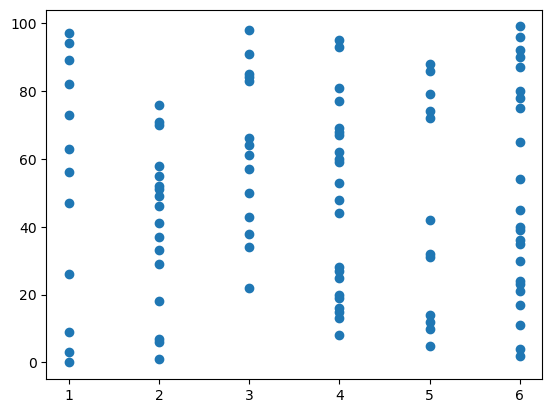

In [198]:
new_df = new_df.sort_values(by="value")
x = new_df["value"]
y = new_df["roll"]
plt.scatter(x,y)
plt.show()

In [131]:
"""
All values seem to be quite equally distributed throughout the number of rolls. 2 is a small outlier as it doesent really
occur after roll number 80. Also 5 has a gap between 45-65.
"""

'\nAll vlaues seem to be quite equally distributed throughout the number of rolls. 2 is a small outlier as it doesent really\noccur after roll number 80. Also 5 has a gap between 45-65.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [134]:
summary_stats(new_df)

Enter name of Column: value


3.74

#### 3.- Now, calculate the frequency distribution.


In [137]:
sorted_df = new_df.groupby("value").agg("count").reset_index()
sorted_df.rename(columns={"roll":"num_of_rolls"},inplace=True)
sorted_df

,value,num_of_rolls
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

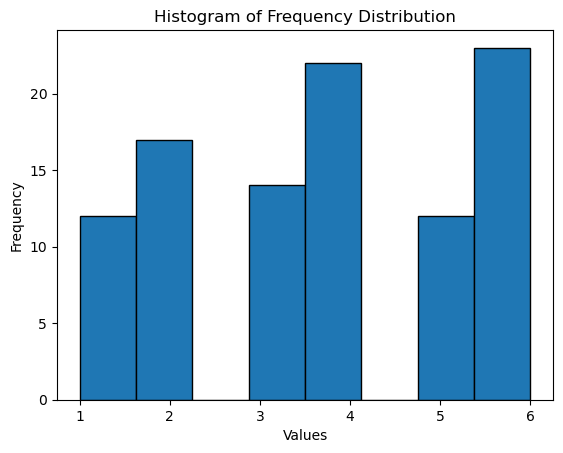

In [140]:
plt.hist(new_df['value'], bins='auto', edgecolor='black')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""
As 3.5 would be the mean if each value had the same Frequency Distribution, but as it can be seen the Freqeuncy for 4 and 6
are the two highest, which is why the mean shift a little bit into their direction (3.7).
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

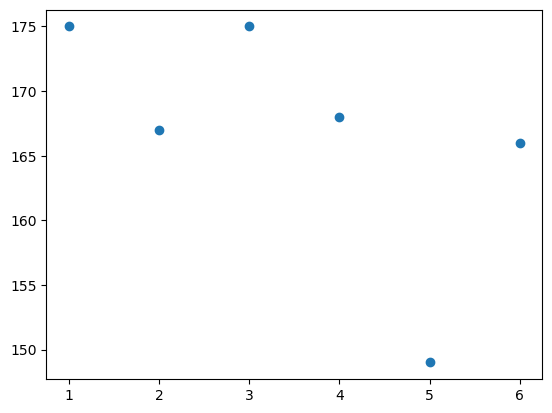

In [199]:
dice_df = pd.read_csv("roll_the_dice_thousand.csv")
dice_df.drop("Unnamed: 0", axis=1, inplace=True)

sorted_dice = dice_df.groupby("value").agg("count").reset_index()
sorted_dice.rename(columns={"roll":"num_of_rolls"},inplace=True)
x = sorted_dice["value"]
y = sorted_dice["num_of_rolls"]
plt.scatter(x,y)
plt.show()

In [200]:
"""
Due to the higher lenght of rolls, the Graphs seems more equally distributed even though the deviation are actually higher.
"""

'\nDue to the higher lenght of rolls, the Graphs seems more equally distributed even though the deviation are actually higher.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

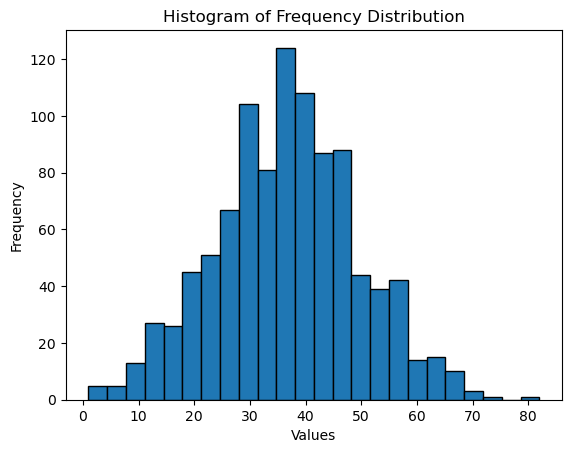

In [201]:
age_pop = pd.read_csv("ages_population.csv")
plt.hist(age_pop['observation'], bins='auto', edgecolor='black')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [202]:
"""Guesses:
mean: 40
std: 18"""

'Guesses:\nmean: 40\nstd: 18'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [203]:
print(f"""Mean : {age_pop["observation"].mean()}
Standard Deviation: {age_pop["observation"].std()}""")

Mean : 36.56
Standard Deviation: 12.816499625976762


In [157]:
"""
Both a bit smaller than I anticipated
"""

'\nBoth a bit smaller than I anticipated\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,observation,count
0,28.0,139
1,27.0,125
2,26.0,120
3,29.0,115
4,25.0,98
5,30.0,90
6,24.0,78
7,31.0,61
8,23.0,41
9,22.0,35


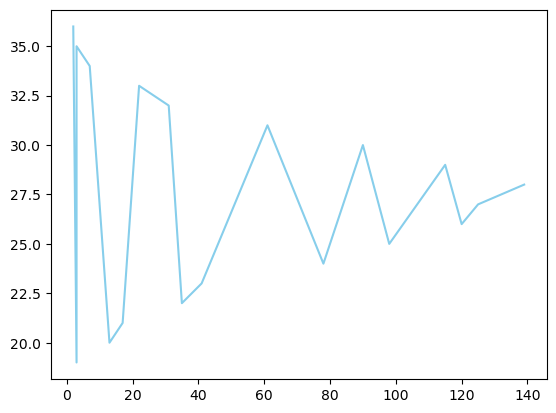

In [206]:
age_pop2 = pd.read_csv("ages_population2.csv")
freq = age_pop2.value_counts().reset_index()
freq.columns = ["observation", "count"]
y = freq["observation"]
x = freq["count"]
display(freq)
plt.plot(x,y,c="skyblue")
plt.show()

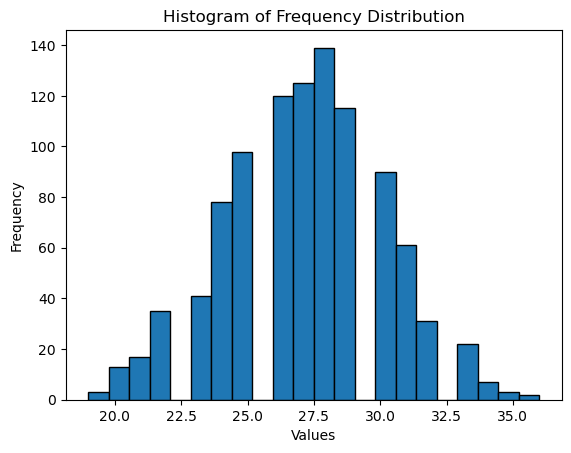

In [168]:
plt.hist(age_pop2['observation'], bins='auto', edgecolor='black')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The range is a lot smaller, for example the max is now where the mean in step 1 was. New mean should be at around 27.
General Distribution is again shaped similiar to a hyperbel.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [173]:
print(f"""Mean : {age_pop2["observation"].mean()}
Standard Deviation: {age_pop2["observation"].std()}""")

Mean : 27.155
Standard Deviation: 2.969813932689186


In [ ]:
"""
Both, Mean and Stdev are a lot smaller. This Neighborhood is a lot younger also their are almost no older people living there.
Most People There are between 22 -32 years old.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

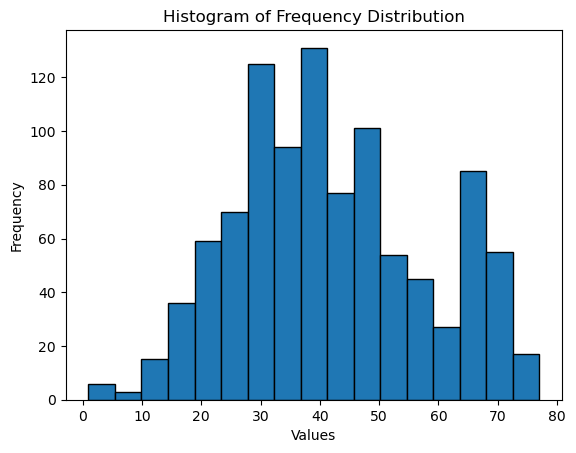

In [175]:
age_pop3 = pd.read_csv("ages_population3.csv")
plt.hist(age_pop3['observation'], bins='auto', edgecolor='black')  
plt.title('Histogram of Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [176]:
print(f"""Mean : {age_pop3["observation"].mean()}
Standard Deviation: {age_pop3["observation"].std()}""")

Mean : 41.989
Standard Deviation: 16.144705959865934


In [ ]:
"""
The Ages in this neighborhood are a little bit higher than the ones in step 1 on average. Also the Stdev is a bit higher.
However in General it can be said that these two neighborhoods are rather similiar to each other.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [178]:
print(age_pop3["observation"].quantile(0.25))
print(age_pop3["observation"].quantile(0.5))
print(age_pop3["observation"].quantile(0.75))
print(age_pop3["observation"].quantile(1))
print(age_pop3["observation"].mean())

30.0
40.0
53.0
77.0
41.989


In [ ]:
"""
The difference between mean and medain is around 1.9 years. 50 % of the people in this neighborhood are between 30 and 53 
years old.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [182]:
print(age_pop3["observation"].quantile(0))
print(age_pop3["observation"].quantile(0.15))
print(age_pop3["observation"].quantile(0.85))
print(age_pop3["observation"].quantile(0.95))

1.0
25.0
64.0
70.0


In [ ]:
"""
only 5% under 25, means not a lot children
15% over 64% so more Senior than children

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""